In [1]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import zipfile
import os
import numpy as np
import shutil
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-30 15:35:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.04MB/s    in 65s     

2020-07-30 15:37:03 (4.75 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# ekstrak zip file
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
root_dir = '/tmp/rockpaperscissors'
new_dir = ['/train', '/val']

# membuat folder train & val
os.makedirs(root_dir + new_dir[0])
train_dir = root_dir + new_dir[0]
os.makedirs(root_dir + new_dir[1])
val_dir = root_dir + new_dir[1]

# membuat folder paper, rock, scissors di dalam folder train & val
for dir in new_dir:
  os.makedirs(root_dir + dir + '/paper')
  os.makedirs(root_dir + dir + '/rock')
  os.makedirs(root_dir + dir + '/scissors')

In [6]:
# pindahkan gambar paper ke folder /train/paper sebanyak 60%
files_paper = os.path.join(root_dir, 'paper')
for f in os.listdir(files_paper)[:int(np.ceil(len(os.listdir(files_paper))*0.6))]:
    shutil.move(files_paper + '/' + f, os.path.join(train_dir, 'paper'))

In [7]:
# pindahkan gambar paper ke folder /val/paper sebanyak 40%
for f in os.listdir(files_paper):
    shutil.move(files_paper + '/' + f, os.path.join(val_dir, 'paper'))

In [8]:
# pindahkan gambar rock ke folder /train/rock sebanyak 60%
files_rock = os.path.join(root_dir, 'rock')
for f in os.listdir(files_rock)[:int(np.ceil(len(os.listdir(files_rock))*0.6))]: 
    shutil.move(files_rock + '/' + f, os.path.join(train_dir, 'rock'))

In [9]:
# pindahkan gambar rock ke folder /val/rock sebanyak 40%
for f in os.listdir(files_rock): 
    shutil.move(files_rock + '/' + f, os.path.join(val_dir, 'rock'))

In [10]:
# pindahkan gambar scissors ke folder /train/scissors sebanyak 60%
files_scissors = os.path.join(root_dir, 'scissors')
for f in os.listdir(files_scissors)[:int(np.ceil(len(os.listdir(files_scissors))*0.6))]: 
    shutil.move(files_scissors + '/' + f, os.path.join(train_dir, 'scissors'))

In [11]:
# pindahkan gambar scissors ke folder /val/scissors sebanyak 40%
for f in os.listdir(files_scissors): 
    shutil.move(files_scissors + '/' + f, os.path.join(val_dir, 'scissors'))

In [12]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=4,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [14]:
# membuat arsitektur model
model = tf.keras.models.Sequential([
    tf.keras.layers.AveragePooling2D((6, 6), 3, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=25,
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=1)

Epoch 1/25
25/25 [==============================] - 2s 74ms/step - loss: 1.1164 - accuracy: 0.4100 - val_loss: 1.1055 - val_accuracy: 0.4000
Epoch 2/25
25/25 [==============================] - 2s 64ms/step - loss: 1.1023 - accuracy: 0.2959 - val_loss: 1.1211 - val_accuracy: 0.2000
Epoch 3/25
25/25 [==============================] - 2s 63ms/step - loss: 1.0946 - accuracy: 0.3600 - val_loss: 1.0634 - val_accuracy: 0.4500
Epoch 4/25
25/25 [==============================] - 2s 68ms/step - loss: 1.0987 - accuracy: 0.3469 - val_loss: 1.0833 - val_accuracy: 0.3500
Epoch 5/25
25/25 [==============================] - 2s 64ms/step - loss: 1.0527 - accuracy: 0.3900 - val_loss: 1.0085 - val_accuracy: 0.6500
Epoch 6/25
25/25 [==============================] - 2s 67ms/step - loss: 1.0405 - accuracy: 0.4600 - val_loss: 0.9881 - val_accuracy: 0.4500
Epoch 7/25
25/25 [==============================] - 2s 66ms/step - loss: 0.8622 - accuracy: 0.6200 - val_loss: 0.8450 - val_accuracy: 0.4500
Epoch 8/25
25

Saving apa ya.jpg to apa ya.jpg
apa ya.jpg
scissors


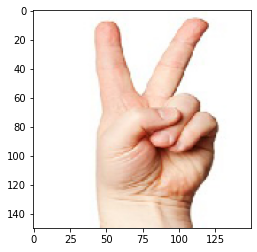

In [17]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
   print('scissors')
  elif classes[0][1]==1:
   print('rock')  
  else:
   print('paper')